<h3>Sampling bias for bus waiting times</h3>

Suppose the interarrival time
for a city bus has an exponential distribution with parameter 1/λ. A passenger arrives at a uniformly random time and records the time until the
next bus arrives. What is the expected waiting time? Use a simulation to
get an answer. Is the answer surprising? Now suppose instead that the
interarrival time is U(0, 2λ). How does this change the situation? (Notice
that the expected interarrival time is λ in both cases.)

In [33]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


In [15]:
exp_times = []
uni_times = []

for i in range(1,1000):
    lambda_ = i
    beta = 1/lambda_
    
    exp_sample = np.random.exponential(beta)
    exp_times.append(exp_sample)
    
    uni_sample = np.random.uniform(0,2*lambda_)
    uni_times.append(uni_sample)
    

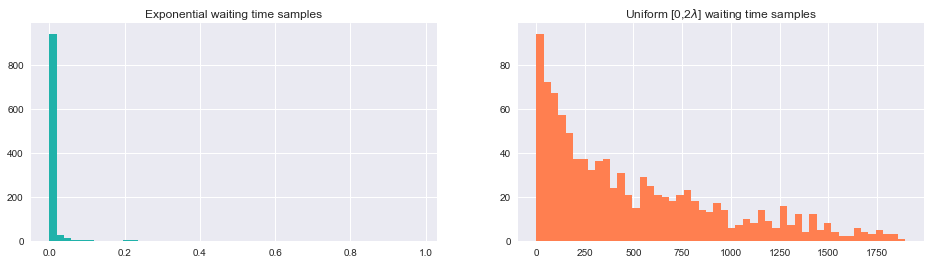

In [30]:
plt.figure(figsize=(16,4))
plt.subplot(1,2,1)
plt.title("Exponential waiting time samples")
exp_plot = plt.hist(exp_times, bins=50, color='lightseagreen')

plt.subplot(1,2,2)
plt.title("Uniform [0,2$\lambda$] waiting time samples")
uni_plot = plt.hist(uni_times, bins=50, color='coral')
plt.show()

<h3>Retirement benefit projection</h3>

At age 50 Fannie Mae has 150,000 USD
invested and will be investing another 10,000 USD per year until age 70. Each
year the investment grows according to an interest rate that is normally
distributed with mean 8% and standard deviation 9%. At age 70, Fannie
Mae then retires and withdraws 65,000 USD per year until death. Below is
given a conditional death probability table. Thus if Fannie Mae lives until
age 70, then the probability of dying before age 71 is 0.04979. Simulate
this process 1000 times and histogram the amount of money Fannie Mae
has at death.


In [32]:
data = {
            50: 0.00832, 51: 0.00911, 52: 0.00996, 53: 0.01089, 54: 0.01190,
            55: 0.01300, 56: 0.01421, 57: 0.01554, 58: 0.01700, 59: 0.01859,
            60: 0.02034, 61: 0.02224, 62: 0.02431, 63: 0.02657, 64: 0.02904,
            65: 0.03175, 66: 0.03474, 67: 0.03804, 68: 0.04168, 69: 0.04561,
            70: 0.04979, 71: 0.05415, 72: 0.05865, 73: 0.06326, 74: 0.06812,
            75: 0.07337, 76: 0.07918, 77: 0.08570, 78: 0.09306, 79: 0.10119,
            80: 0.10998, 81: 0.11935, 82: 0.12917, 83: 0.13938, 84: 0.15001,
            85: 0.16114, 86: 0.17282, 87: 0.18513, 88: 0.19825, 89: 0.21246,
            90: 0.22814, 91: 0.24577, 92: 0.26593, 93: 0.28930, 94: 0.31666,
            95: 0.35124, 96: 0.40056, 97: 0.48842, 98: 0.66815, 99: 0.72000,
            100: 0.76000, 101: 0.80000, 102: 0.85000, 103: 0.90000,
            104: 0.96000, 105: 1.00000
        }

In [76]:
investment = 150000
age = 50
investments = []

for i in range(1000):
    investment = 150000
    age = 50
    for years in range(1000):
        if np.random.uniform() < data[age]: 
            break
        if age <= 70:
            investment += 10000
        age += 1
        interest_rate = np.random.normal(0.08,0.09)
        investment = investment * (1 + interest_rate)
        investments.append(investment)    
        #print(f"Her investment at age {age} was {investment}")

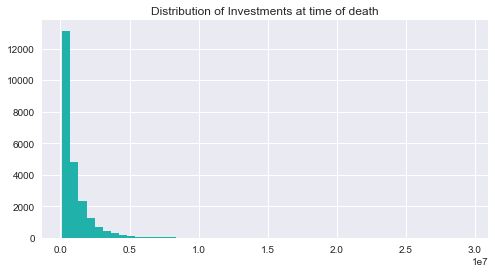

In [77]:
plt.figure(figsize=(8,4))
plt.title("Distribution of Investments at time of death")
invest_plot = plt.hist(investments, bins=50, color='lightseagreen')